In [1]:
import matplotlib.pyplot as plt
import cv2
import random
from glob import glob
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [2]:
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.16.2


In [3]:
import tensorflow as tf
print(tf.__version__)


2.16.2


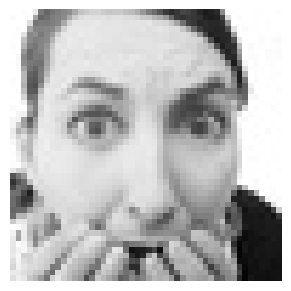

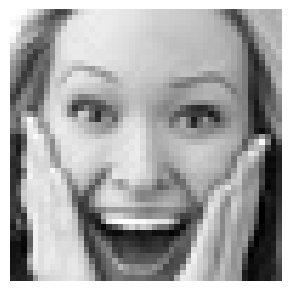

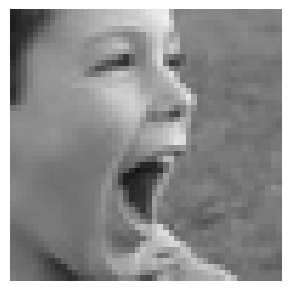

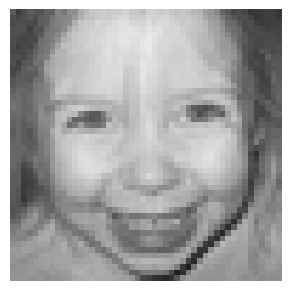

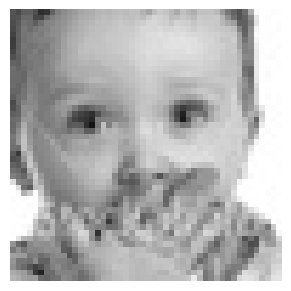

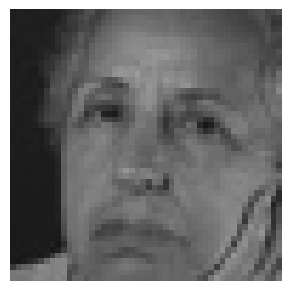

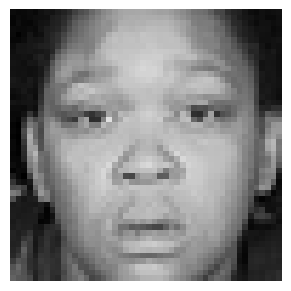

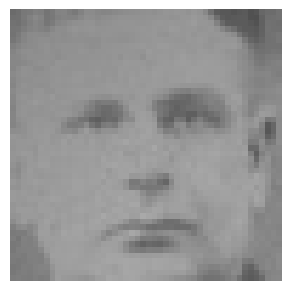

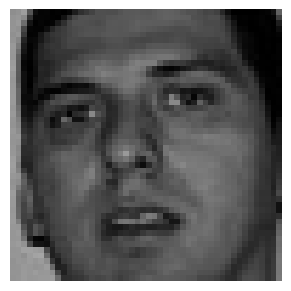

In [4]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

** preparing data for training**


In [5]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)
datagen_validation=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Defining model

In [6]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x) #REMOVE OVERFITTING
    X=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x) #to decrease image dimension to run smoothly
    x=Dropout(0.25)(x)
    
    return x

    
    

In [7]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    X=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x

    

In [8]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(conv_1,64,(5,5))
    conv_3=Convolution(conv_2,128,(3,3))
    
    flatten=Flatten()(conv_3)
    
    dense_1=Dense_f(flatten,256)
    
    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model

In [9]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer (InputLayer)           │ (None, 48, 48, 1)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d (Conv2D)                    │ (None, 48, 48, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization                │ (None, 48, 48, 32)            │         128 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 24, 24, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 24, 24, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 24, 24, 64)            │      51,264 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_1              │ (None, 24, 24, 64)            │         256 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 12, 12, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 12, 12, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 12, 12, 128)           │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_2              │ (None, 12, 12, 128)           │         512 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 6, 6, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 6, 6, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 4608)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 256)                   │   1,179,904 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_3              │ (None, 256)                   │       1,024 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 7)                     │       1,799 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

Initializing the model


In [10]:
epochs=20
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint('model_.weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]


#training model

In [ ]:
history=model.fit(
x=train_generator,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_steps,
callbacks=callbacks)

Epoch 1/20


C:\Users\chais\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1936 - loss: 3.0348
Epoch 1: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.1937 - loss: 3.0335 - val_accuracy: 0.1498 - val_loss: 2.3194
Epoch 2/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:59 267ms/step - accuracy: 0.2969 - loss: 1.9345
Epoch 2: saving model to model_.weights.h5


C:\Users\chais\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.2969 - loss: 0.9694 - val_accuracy: 0.3000 - val_loss: 0.9705
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2234 - loss: 1.9072
Epoch 3: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.2234 - loss: 1.9071 - val_accuracy: 0.1759 - val_loss: 1.9514
Epoch 4/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:52 251ms/step - accuracy: 0.2031 - loss: 1.7841
Epoch 4: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.2031 - loss: 0.8940 - val_accuracy: 0.3000 - val_loss: 0.8832
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.2380 - loss: 1.8545
Epoch 5: saving model to model_.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 129s 287ms/step - accuracy: 0.2380 - loss: 1.8544 - val_accuracy: 0.1735 - val_loss: 1.9693
Epoch 6/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:59 267ms/step - accuracy: 0.2656 - loss: 1.8485
Epoch 6: saving model to model_.weights.h

In [12]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5050 - loss: 1.3306


[1.3215644359588623, 0.5059905052185059]

*plotting loss*

AttributeError: Line2D.set() got an unexpected keyword argument 'loc'

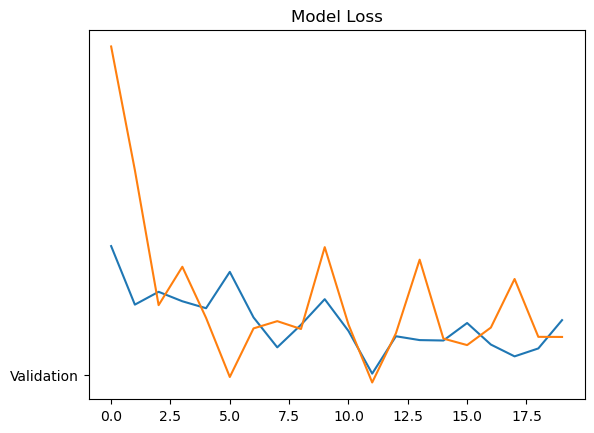

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.plot(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

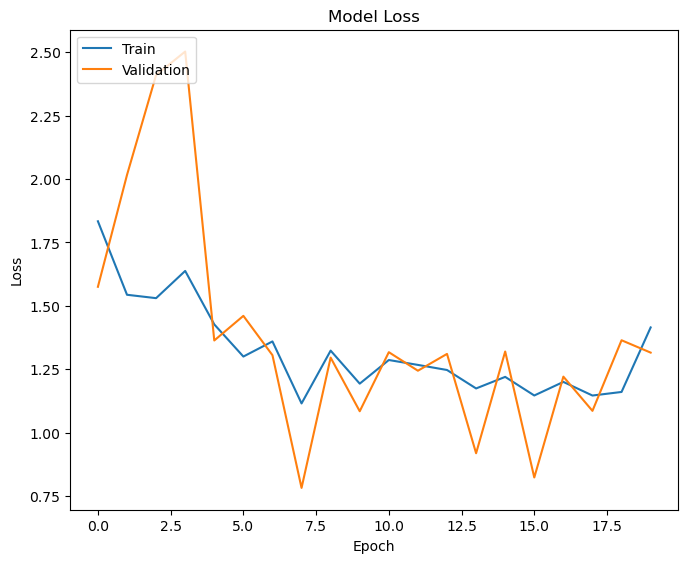

In [13]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()


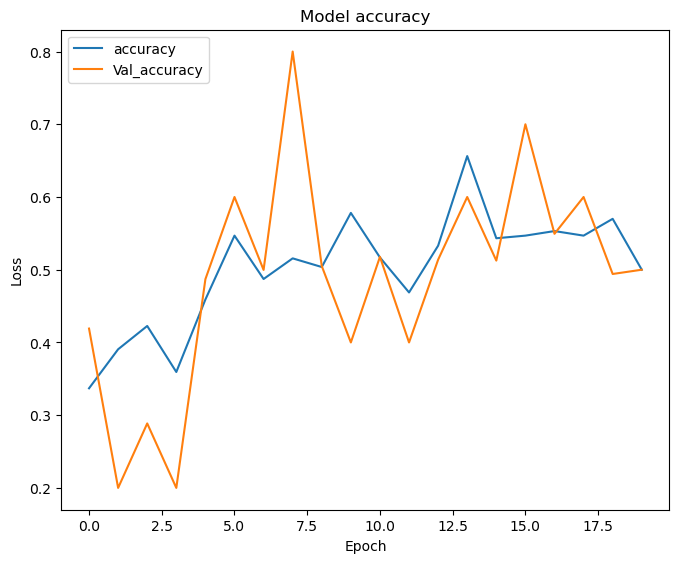

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()


#saving model


In [15]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)
